## Importing and Loading

### Importing relevant libs

In [8]:
import dvc.api
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

import warnings
warnings.filterwarnings('ignore')

In [9]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from extract_data import ExtractData
from clean_data import CleanData
from plot import Plot

In [10]:
cleaner = CleanData()
extracter = ExtractData()
plot = Plot()

In [11]:
train = 'data/train_store.csv'
test = 'data/test_store.csv'
repo = 'https://github.com/tibarekb/Pharmaceutical-Sales-Prediction'


In [12]:
train_data_url = dvc.api.get_url(
    path=train,
    repo=repo,
    rev="TrainStoreVersion"
)

KeyboardInterrupt: 

In [13]:
train_df = extracter.read_csv("../data/train_store.csv")
test_df = extracter.read_csv("../data/test_store.csv")

In [14]:
train_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)

In [15]:
# Set date as index
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

In [14]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2013-01-02,1,3,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2013-01-03,1,4,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2013-01-04,1,5,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2013-01-05,1,6,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [15]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,
2015-08-01,40233,1,6,1.0,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-08-02,39377,1,7,0.0,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-08-03,38521,1,1,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-08-04,37665,1,2,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-08-05,36809,1,3,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [16]:
# Only want closing price for each day 
sales = train_df[["Sales", "StoreType"]]
sales.head()

,Sales,StoreType
Date,,
2013-01-01,0,c
2013-01-02,5530,c
2013-01-03,4327,c
2013-01-04,4486,c
2013-01-05,4997,c


In [17]:
train_df.sort_index(inplace=True)

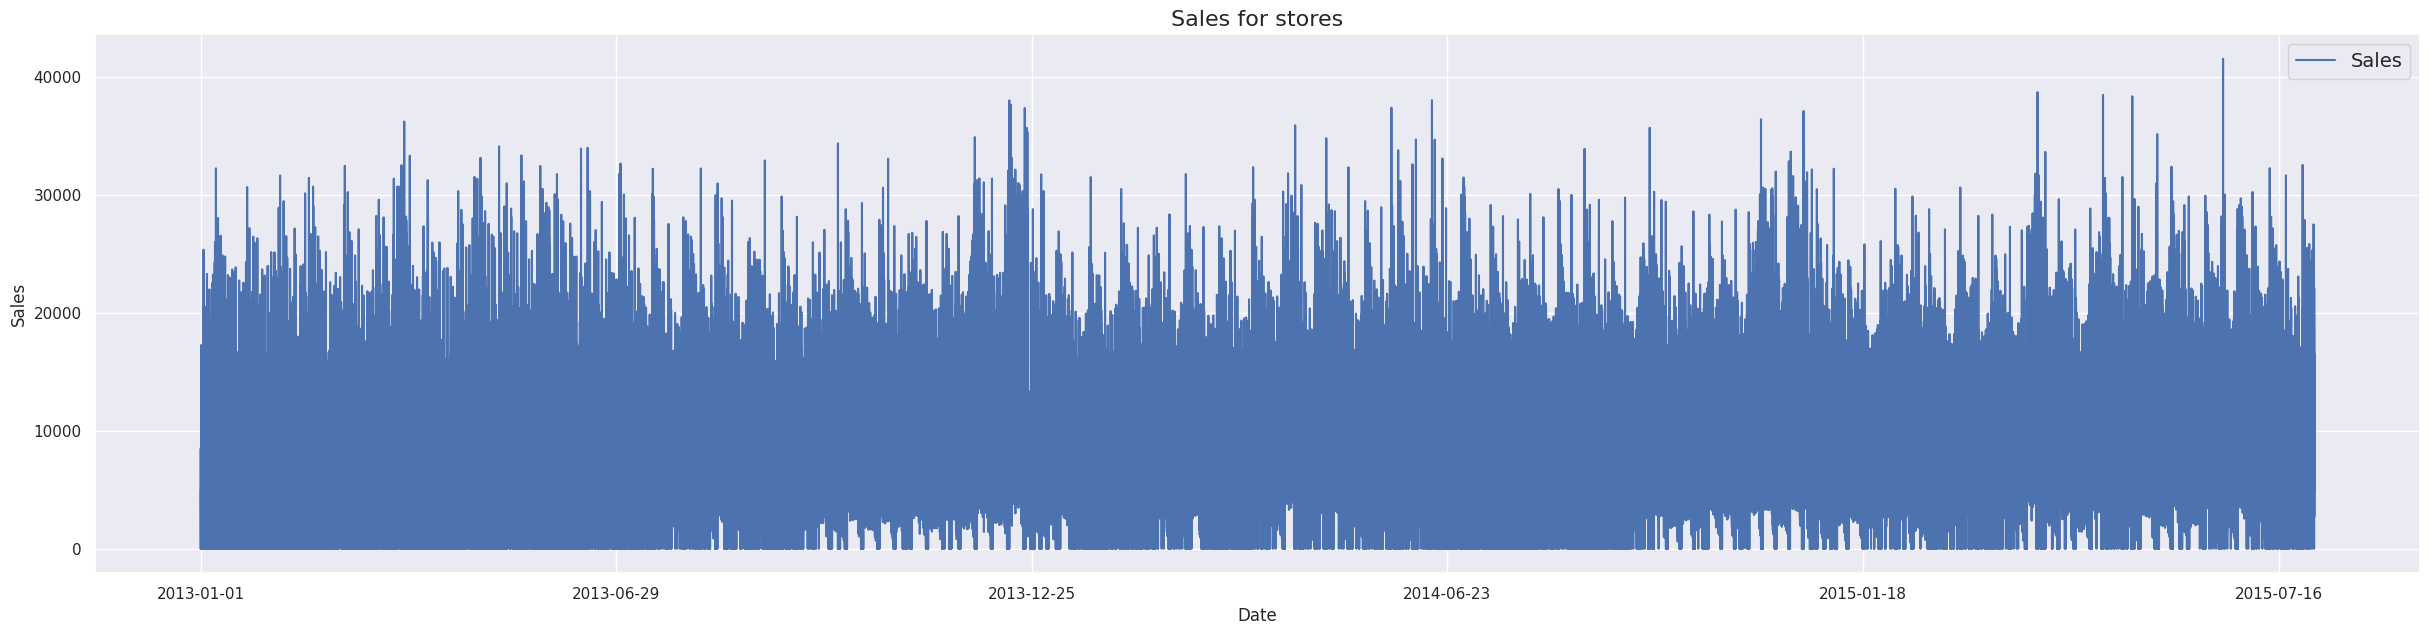

In [18]:
sns.set()
train_df[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales for stores", fontsize=16)
plt.legend(fontsize=14);

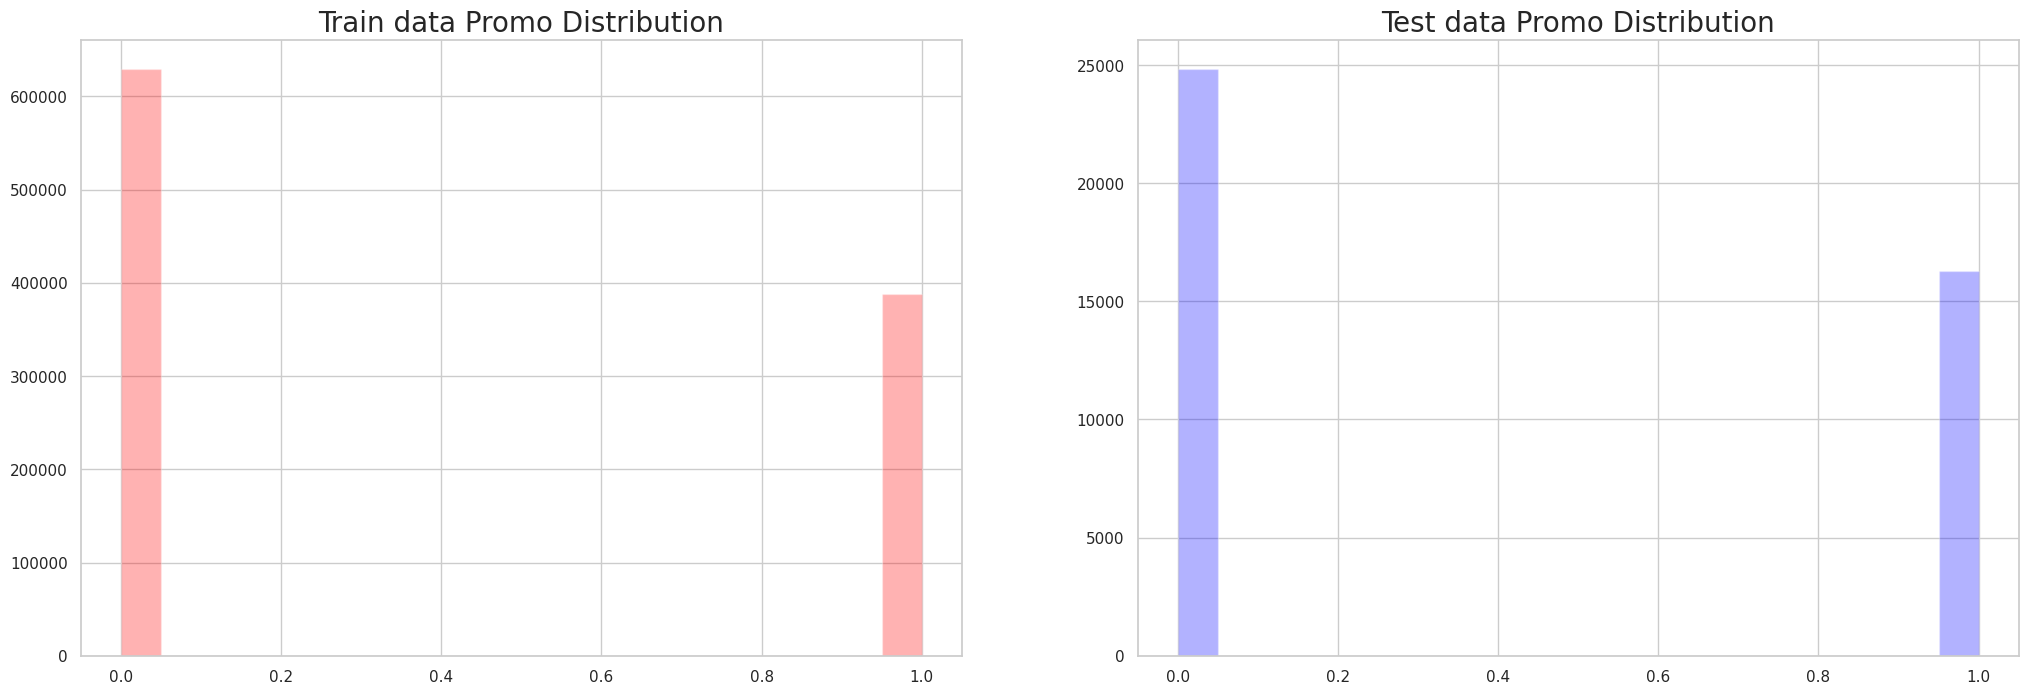

In [19]:
plot.plot_subplots(train_df['Promo'], test_df['Promo'], 'Train data Promo Distribution', 'Test data Promo Distribution')

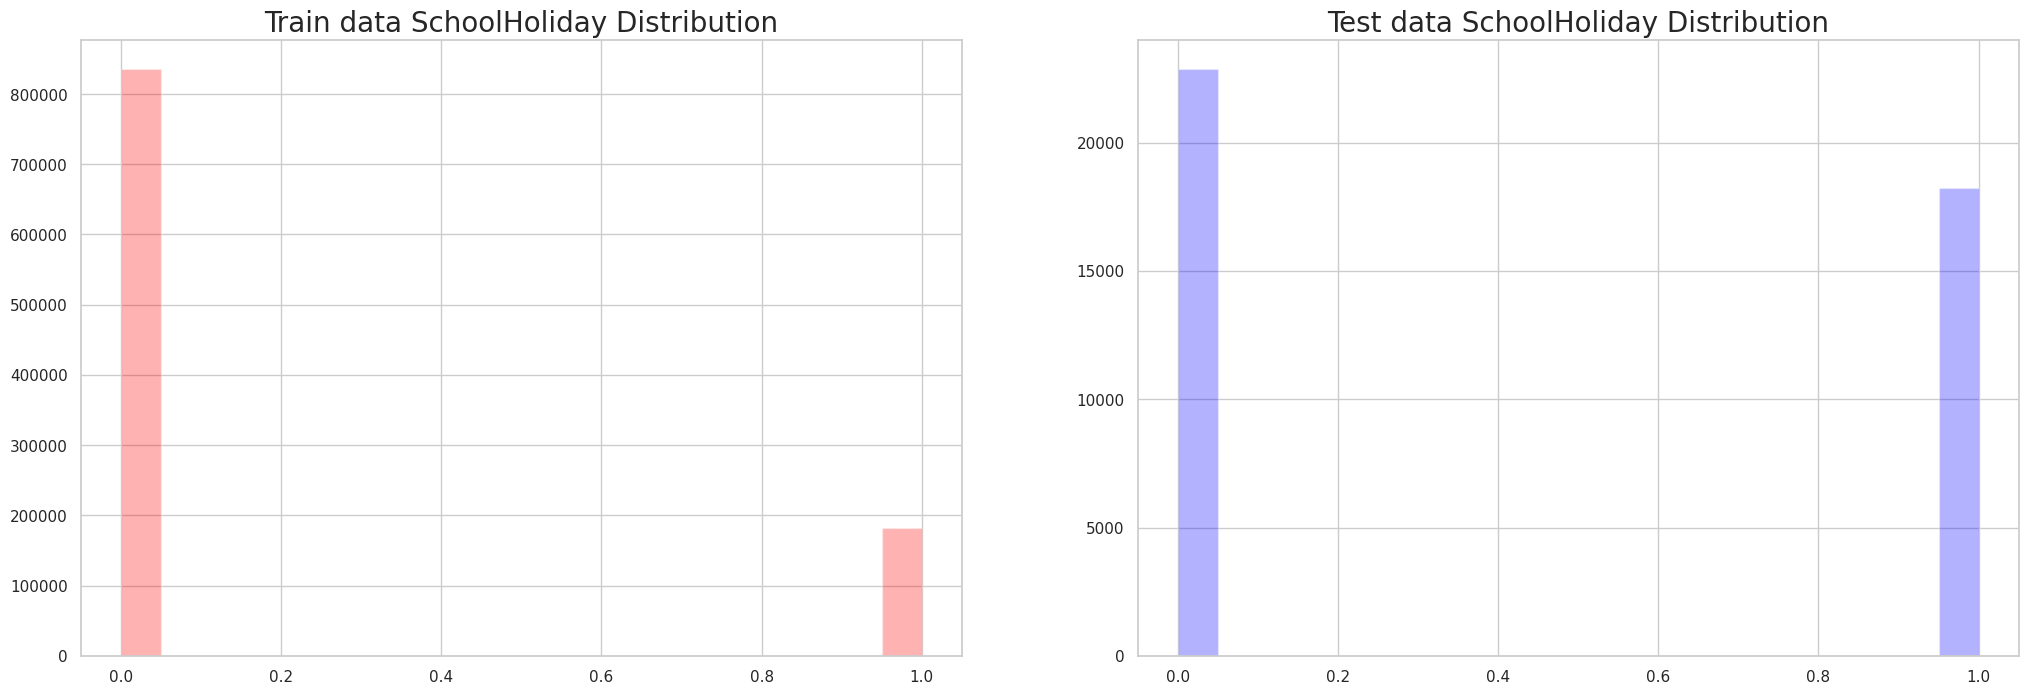

In [20]:
plot.plot_subplots(train_df['SchoolHoliday'], test_df['SchoolHoliday'], 'Train data SchoolHoliday Distribution', 'Test data SchoolHoliday Distribution')

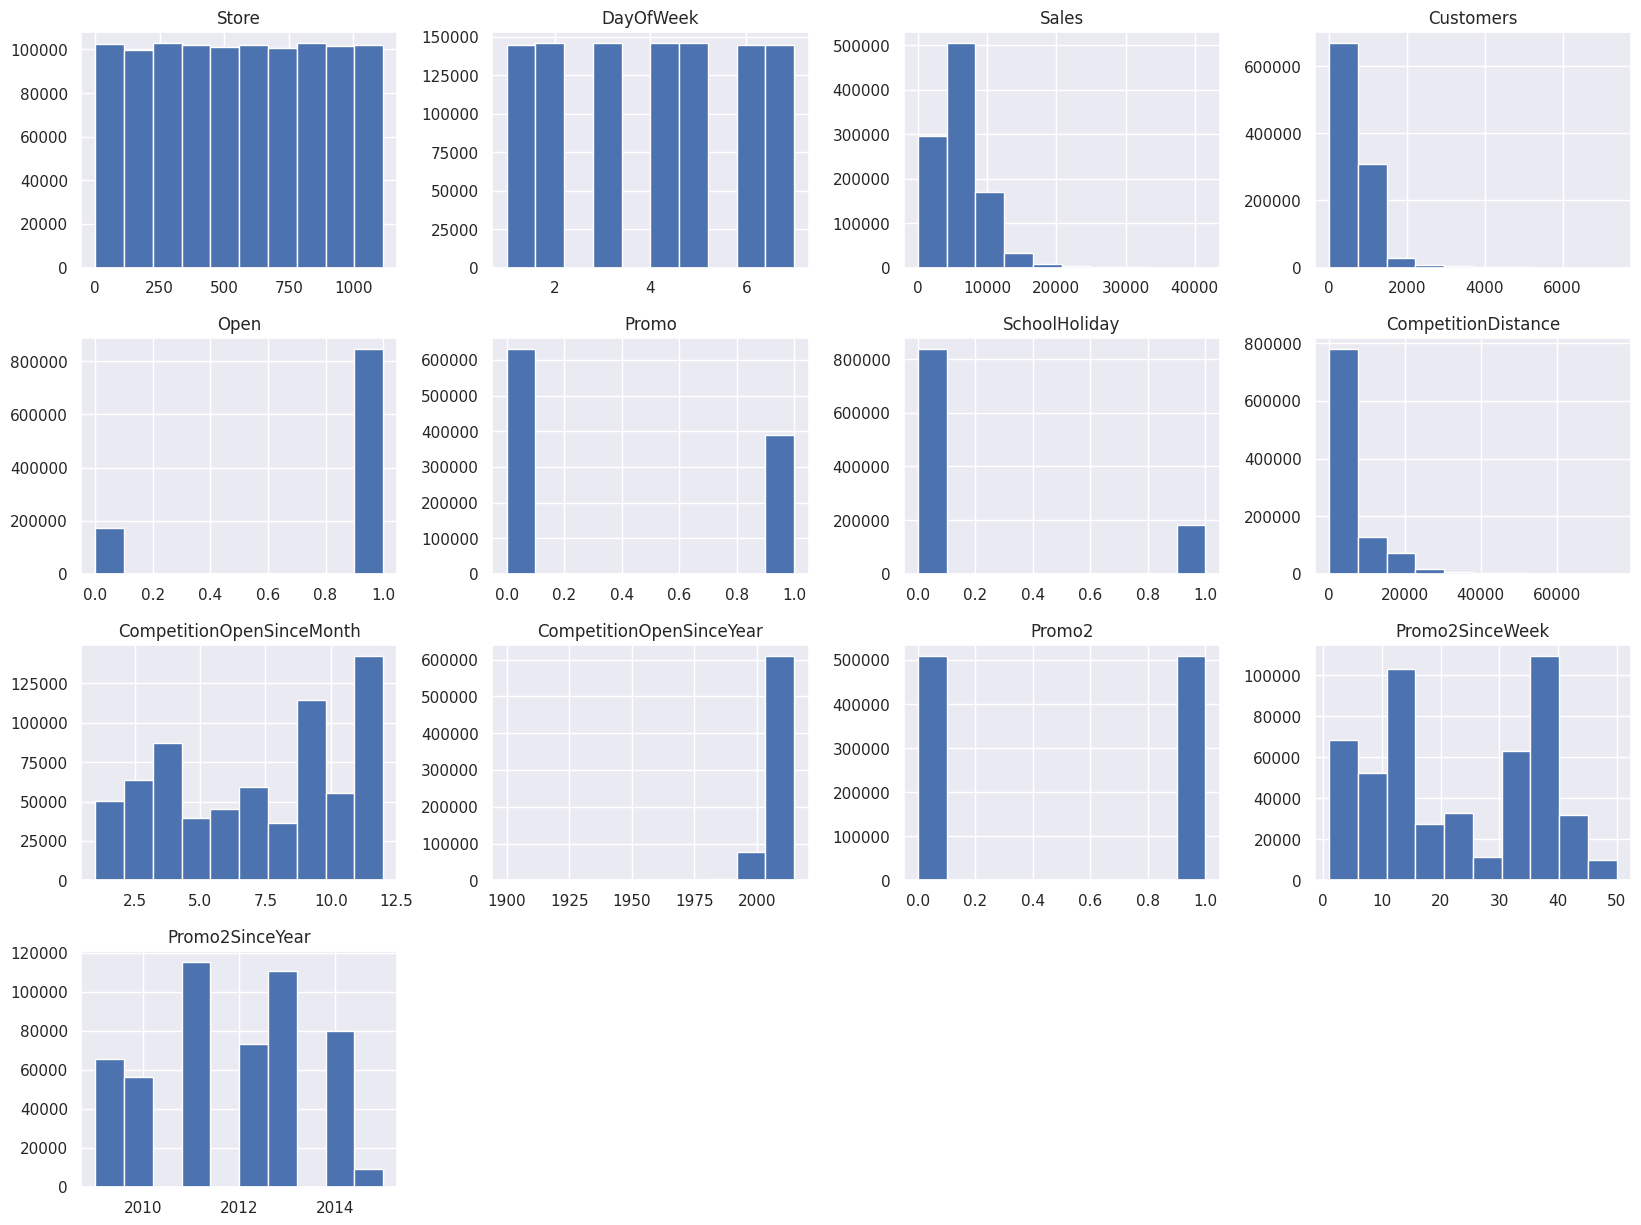

In [21]:
plot.plot_hist_muli(train_df)

<AxesSubplot:title={'center':'Promo vs.Customers'}, xlabel='Promo', ylabel='Customers'>

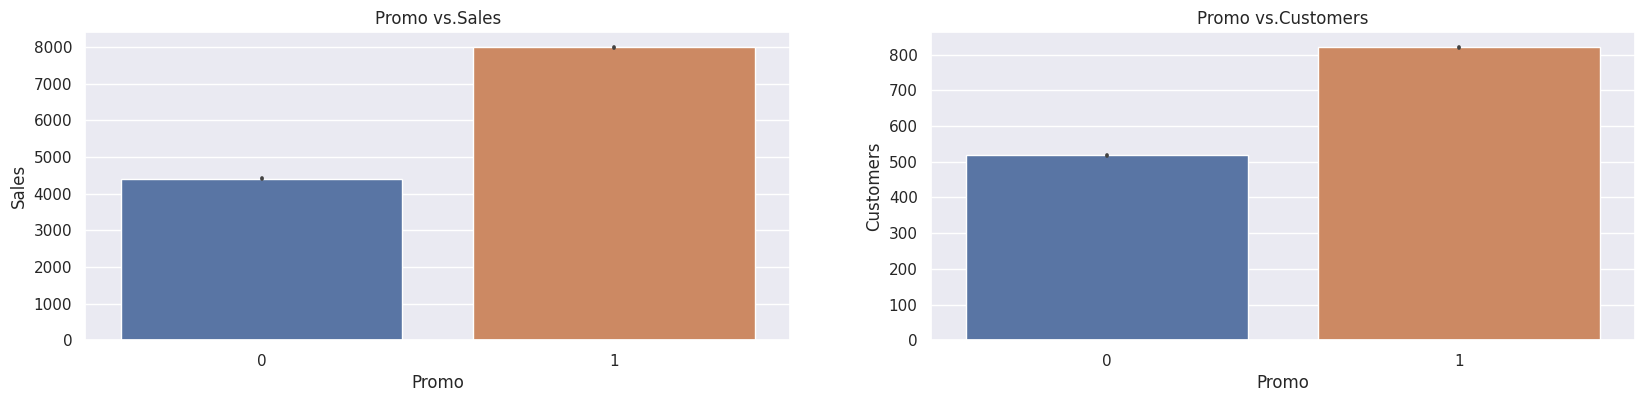

In [23]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=train_df, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=train_df, ax=axis2)



### Obseravtions:

###### Here we observe that both Sales and Customers increases by a significant amount during Promotions. This shows that Promotion has a positive effect for a store.




<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

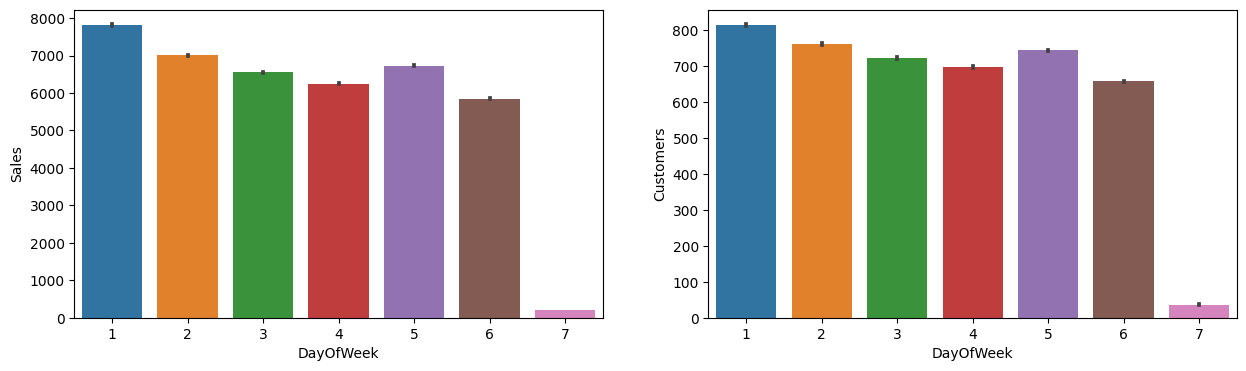

In [21]:
# DayOfWeek
# In both cases where the store is closed and opened.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=train_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=train_df, order=[1,2,3,4,5,6,7], ax=axis2)




### Observations: Here we observe that Sales and Customers are both very less on Sundays as most of the stores are closed on Sunday.

##### Also, Sales on Monday is highest in whole week. This might be due to the fact that stores are closed on Sundays.

##### It is also interesting to note that Christmas and New Year lead to increase in sales. As Rossmann Stores sells health and beauty products, it may be guessed that during Christmas and New Year people buy beauty products as they go out to celebrate and, this might the cause of sudden increase in sales.


### Open Column

<AxesSubplot:xlabel='Open', ylabel='count'>

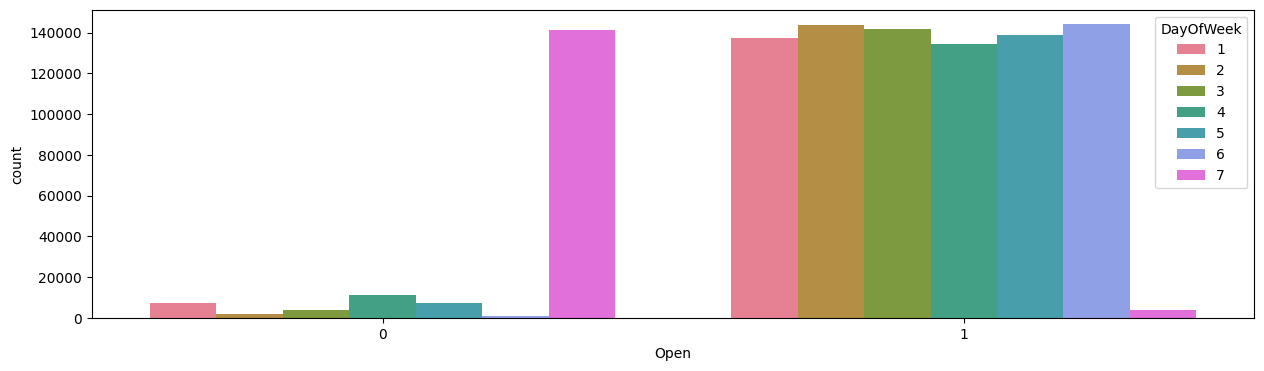

In [22]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_df,palette="husl", ax=axis1)



### Observations:

#### This clearly shows that most of the stores remain closed during Sundays. Some stores were closed in weekdays too, this might be due to State Holidays as stores are generally closed during State Holidays and opened during School Holidays.


In [ ]:
#State Holiday.
train_df["StateHoliday"] = train_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=train_df, ax=axis2)